In [1]:
import sys
sys.path.append('..')
import autoDiff.element_func as fun
from autoDiff.operator import *
from autoDiff.optimization import *
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Gradient Descent

Gradient descent is a first order methods.
It simply starts at an initial point and then repeatedly takes a step opposite to the
gradient direction of the function at the current point. 

The gradient descent algorithm to minimize a function $f(x)$ is as follows:

1:   Choose initial guess $x_0$

2:   for k = 0, 1, 2, ... do 

3:       $s_k$ = -$\nabla f(x_k)$ 

4:       choose $\alpha_k$ 

5:       $x_{k+1} = x_k + \alpha_k s_k$ 

6:   end for

## Demo

Minimize the function $f(x,y) = 4(y-x^2)^2 + (1-x)^2$

Global Minimum at $(x,y) = (1,1)$ and $f(x,y) = 0$

In [48]:
def f(variables):
    x, y = variables
    return 4 * (y - (x ** 2)) ** 2 + (1 - x) ** 2
init_vars = [-6, -5]
solution, xy_path, f_path = GradientDescent(f, init_vars, iters=21000, eta=0.002)

In [49]:
solution.val

array([0.99999994, 0.99999988])

Text(0.5, 1.0, 'error')

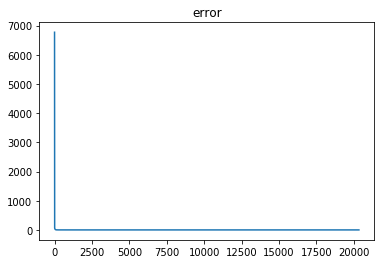

In [57]:
# plot error
plt.plot(f_path)
plt.title("error")

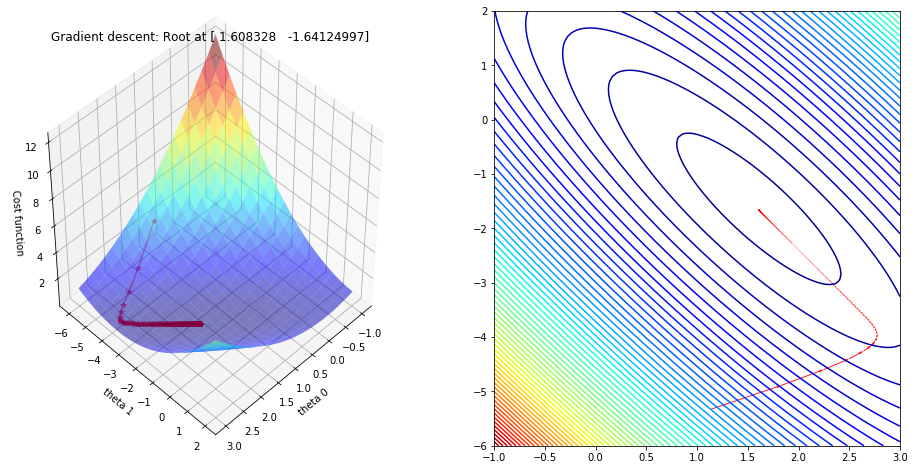

In [112]:
#Creating the dataset (as previously)
x = np.linspace(0,1,40)
noise = 1*np.random.uniform(  size = 40)
y = np.sin(x * 1.5 * np.pi )
y_noise = (y + noise).reshape(-1,1)
X = np.vstack((np.ones(len(x)),x)).T


#Setup of meshgrid of theta values
T0, T1 = np.meshgrid(np.linspace(-1,3,100),np.linspace(-6,2,100))

#Computing the cost function for each theta combination
zs = np.array(  [costfunction(X, y_noise.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(T0), np.ravel(T1)) ] )
#Reshaping the cost values    
Z = zs.reshape(T0.shape)


#Computing the gradient descent
theta_result,J_history, theta_0 = gradient_descent(X,y_noise,np.array([0,-6]).reshape(-1,1),alpha = 0.3,num_iters=1000)

#Angles needed for quiver plot
anglesx = np.array(theta_0)[1:] - np.array(theta_0)[:-1]
anglesy = np.array(theta_1)[1:] - np.array(theta_1)[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T0, T1, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.plot(theta_0,theta_1,J_history, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')

ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost function')
ax.set_title('Gradient descent: Root at {}'.format(theta_result.ravel()))
ax.view_init(45, 45)


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(T0, T1, Z, 70, cmap = 'jet')
ax.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)

plt.show()

## BFGS(Broyden–Fletcher–Goldfarb–Shanno algorithm)

BFGS is a method to solve an unconstrained nonlinear program that proceeds as follows:

From an initial guess ${x}_0$ and an approximate Hessian matrix $B_0$ the following steps are repeated as $f{x}$ converges to the solution:

Obtain a direction ${p}_k$ by solving $B_k {p}_k = -\nabla f(\mathbf{x}_k)$

Perform a one-dimensional optimization line search to find an acceptable stepsize $\alpha_k$ in the direction found in the first step, so $\alpha_k=\arg \min f(\mathbf{x}_k+\alpha\mathbf{p}_k)$.

Set $\mathbf{s}_k = \alpha_k \mathbf{p}_k$ and update $\mathbf{x}_{k+1} = \mathbf{x}_k + \mathbf{s}_k$.

$\mathbf{y}_k = {\nabla f(\mathbf{x}_{k+1}) - \nabla f(\mathbf{x}_k)}$

$B_{k+1} = B_k + \frac{\mathbf{y}_k \mathbf{y}_k^{\mathrm{T}}}{\mathbf{y}_k^{\mathrm{T}} \mathbf{s}_k} - \frac{B_k \mathbf{s}_k \mathbf{s}_k^{\mathrm{T}} B_k }{\mathbf{s}_k^{\mathrm{T}} B_k \mathbf{s}_k}$.


## Demo

Minimize the function $f(x,y) = 4(y-x^2)^2 + (1-x)^2$

Global Minimum at $(x,y) = (1,1)$ and $f(x,y) = 0$

In [59]:
def f(variables):
    x, y = variables
    return 4 * (y - (x ** 2)) ** 2 + (1 - x) ** 2
init_vars = [-6, -5]
solution, xy_path, f_path = BFGS(f, init_vars, iters=21000)

In [60]:
solution.val

array([1., 1.])

Text(0.5, 1.0, 'error')

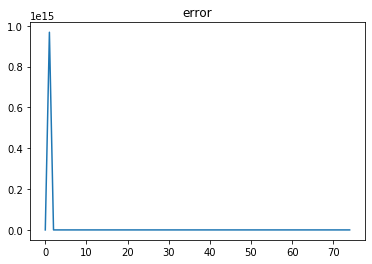

In [61]:
# plot error
plt.plot(f_path)
plt.title("error")

## Root finding using Newton's method

Newton root finding starts from an intial guess $x_0$ and converges to x such that $f(x)$ = 0. It is and iterative method as follows:

Until Iteration or $f(x)=0$:

univariate case:
$
x_{t+1} = x_t - \frac{f(x_t)}{f'(x_t)}
$

Multivaraite case:
$
x_{t+1} = x_t - (J(f)(x_t))^{-1}f(x_t)
$

Note: Newton method is not guaranteed to converge and converges at a linear speed when $f\prime(x_0)= 0$ , so when this situtaion happen, we randomly choose a derivative of $\pm1$ as the next direction.

## Demo

### Univariate

$f(x) = x-e^{-2sin^{2}(4x)}+ 0.3$

Starting point: $x_{0} = 0$

In [64]:
def f(x):
    return x - fun.exp(-2.0 * fun.sin(4.0 * x) * fun.sin(4.0 * x)) + 0.3

# start at 0
x0 = 0

# finding the root
solution, x_path, y_path = NewtonRoot(f, x0)

In [65]:
solution.val

array([0.16640223])

In [66]:
f(solution.val)

array([-5.55111512e-17])

Text(0.5, 1.0, 'error')

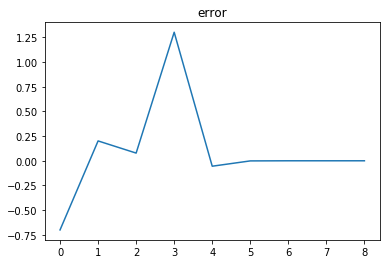

In [68]:
# plot error
plt.plot(y_path)
plt.title("error")

### Mutltivariate

$f(x,y) = x^2 + 4y^2 - 2x^2y + 4$

Starting point: $x_0 = -8$, $y_0 = -5$
 

In [71]:
# define f function
def f(variables):
    x, y = variables
    return x ** 2 + 4 * y ** 2 - 2 * (x ** 2) * y + 4

# start at x0=−8.0,y0= −5
x0 = -8.0
y0 = -5.0
init_vars = [x0, y0]

# finding the root and visualize the trace
solution, xy_path, f_path = NewtonRoot(f, init_vars)

In [72]:
solution.val

array([-3.40689411,  0.77609879])

In [73]:
f(solution.val)

1.7763568394002505e-15

Text(0.5, 1.0, 'error')

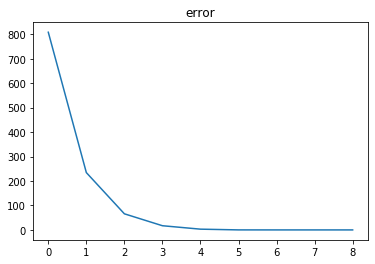

In [75]:
# plot error
plt.plot(f_path)
plt.title("error")

## Quadratic Spline

A spline function consists of polynomial pieces on subin- tervals joined together with certain continuity conditions. Formally, suppose that $n+1$ points $x0,x1,··· ,xn$ have been specified and satisfy $x0 < x1 < ··· < xn$. 

These points are called knots. Suppose also that an integer k ≥ 0 has been prescribed. A spline function of degree $k$ having knots $x0, x1, · · · , xn$ is a function S such that:

1. on each interval $[x_i−1, x_i]$, S is a polynomial of degree ≤ k;
2. S has a continuous $(k − 1)$st derivative on $[x0 , xn]$.

Hence, S is a piecewise polynomial of degree at most k having continuous derivatives of all orders up to k − 1.
A spline of degree 2 is piecewise linear and has the form

$$
S(x) =
\begin{cases}
p_1(x)=a_1 +b_1x+ c_1x^2, x∈[x_0,x_1),\\
p_2(x)=a_2 +b_2x+ c_2x^2, x∈[x_1 ,x_2 ),\\
\cdots\\
p_n(x) = a_n + b_nx+ c_nx^2, x ∈ [x_n−1, x_n]\\
\end{cases}
$$

## Demo

Plot the quadratic spline $f(x) = e^x$ for $x\in [-1,1]$ with 20 intervals

In [100]:
def f1(x):
    return fun.exp(x)

xMin1 = -1
xMax1 = 1
nIntervals1 = 20
nSplinePoints1 = 5
y1, A1, coeffs1, ks1 = quad_spline_coeff(f1, xMin1, xMax1, nIntervals1)

In [101]:
spline_points1 = spline_points(f1, coeffs1, ks1, nSplinePoints1)
len(spline_points1)

20

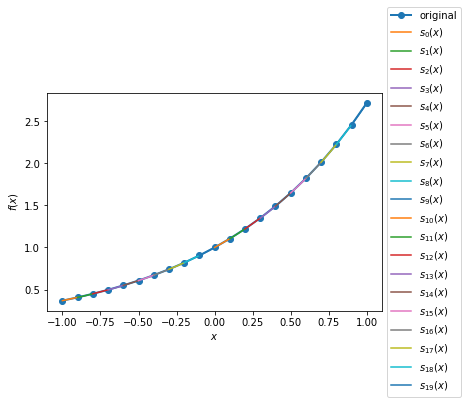

In [102]:
fig1 = quad_spline_plot(f1, coeffs1, ks1, nSplinePoints1)

### Approximate More Complex functions 

$f(x) = x-e^{-2sin^{2}(4x)}+ 0.3$

In [103]:
def f1(x):
    return x - fun.exp(-2.0 * fun.sin(4.0 * x) * fun.sin(4.0 * x)) + 0.3
xMin1 = -1
xMax1 = 1
nIntervals1 = 20
nSplinePoints1 = 5
y1, A1, coeffs1, ks1 = quad_spline_coeff(f1, xMin1, xMax1, nIntervals1)

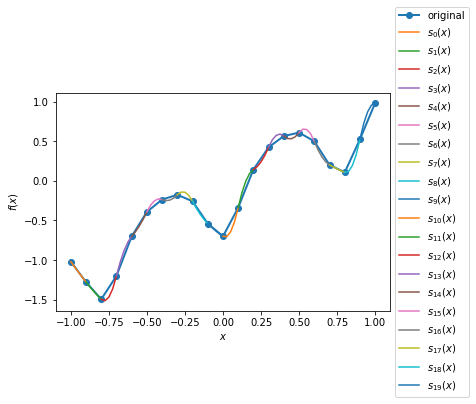

In [104]:
fig1 = quad_spline_plot(f1, coeffs1, ks1, nSplinePoints1)